In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv("train.csv")

In [78]:
print(titanic_df.info())
print(titanic_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [80]:
titanic_df = titanic_df.assign(
    Age=titanic_df['Age'].fillna(titanic_df['Age'].median()),
    Embarked=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
)
titanic_df = titanic_df.drop(columns=['Cabin']) 

In [82]:
titanic_df = titanic_df.assign(
    Sex=titanic_df['Sex'].map({'male': 0, 'female': 1}),
    Embarked=titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
)

C:\Users\sinci\AppData\Local\Temp\ipykernel_12152\2651758426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_df, palette='coolwarm')


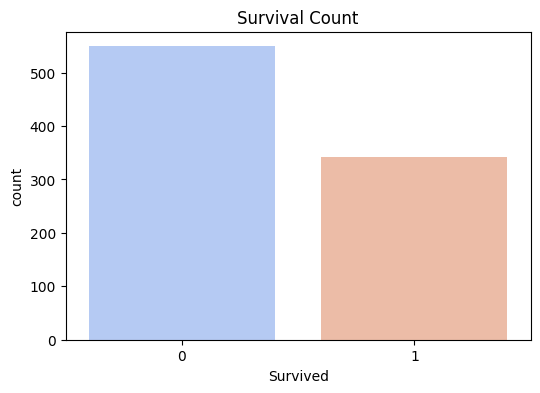

In [84]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival Count')
plt.show()

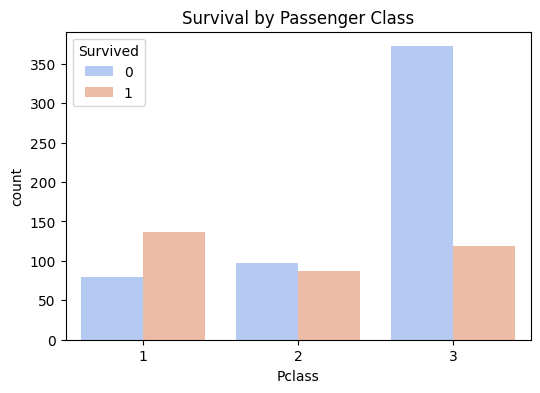

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival by Passenger Class')
plt.show()

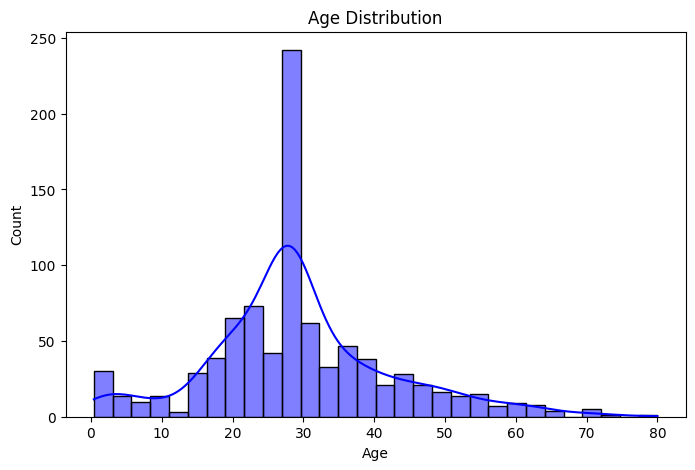

In [88]:
plt.figure(figsize=(8,5))
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

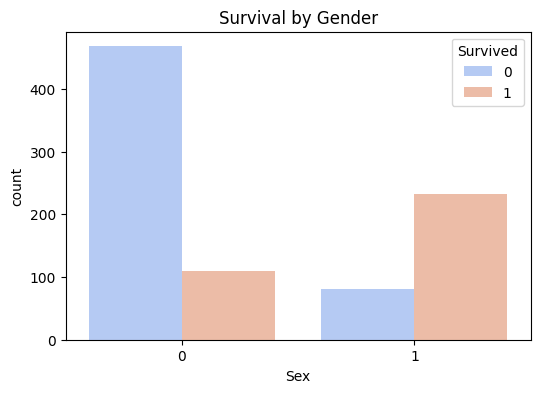

In [90]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()

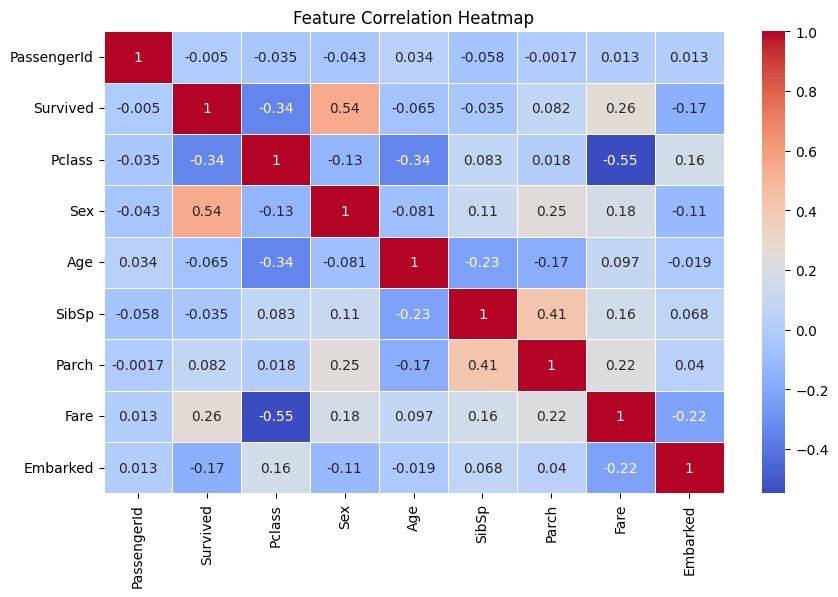

In [92]:
plt.figure(figsize=(10,6))
numeric_df = titanic_df.select_dtypes(include=['number']) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()